In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

In [ ]:
train = pd.read_csv("/kaggle/input/dacon/train.csv")
test = pd.read_csv("/kaggle/input/dacon/test.csv")

---------------------------- try : 0th -------------------------


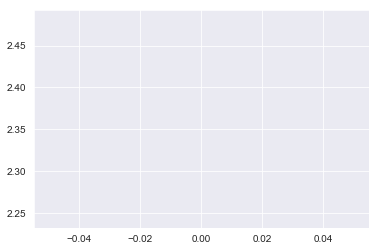

---------------------------- try : 100th -------------------------


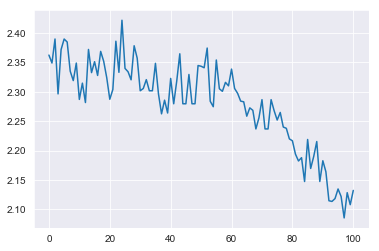

---------------------------- try : 200th -------------------------


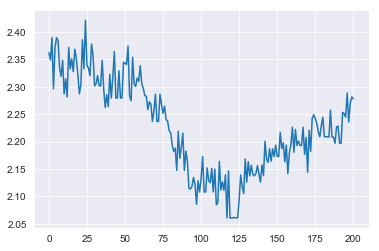

---------------------------- try : 300th -------------------------


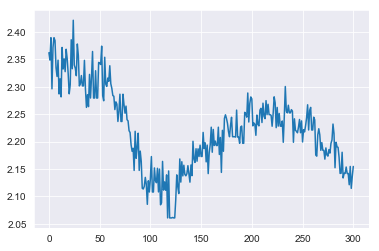

---------------------------- try : 400th -------------------------


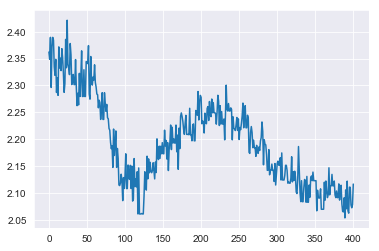

---------------------------- try : 500th -------------------------


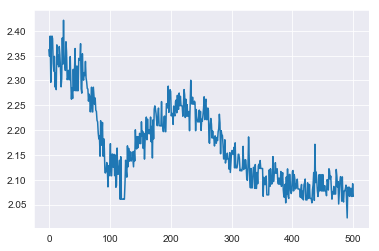

---------------------------- try : 600th -------------------------


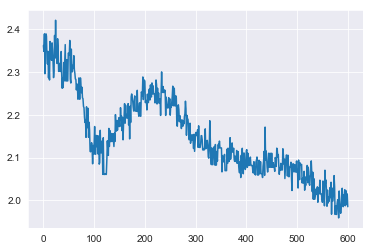

---------------------------- try : 700th -------------------------


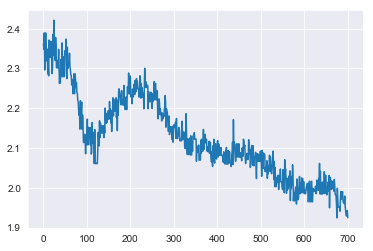

---------------------------- try : 800th -------------------------


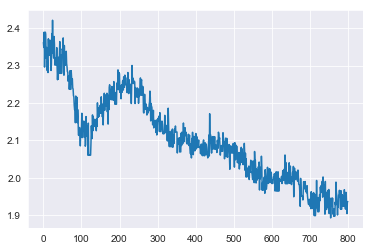

---------------------------- try : 900th -------------------------


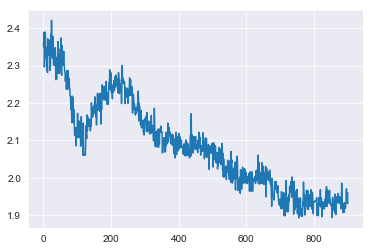

---------------------------- try : 1000th -------------------------


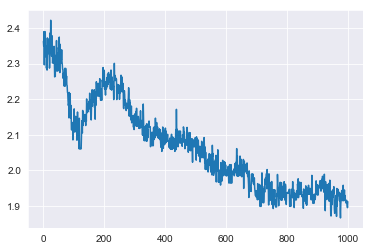

---------------------------- try : 1100th -------------------------


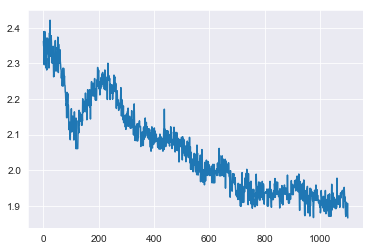

---------------------------- try : 1200th -------------------------


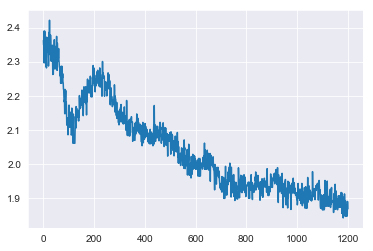

---------------------------- try : 1300th -------------------------


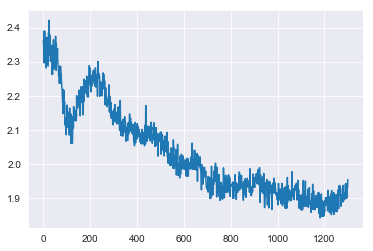

---------------------------- try : 1400th -------------------------


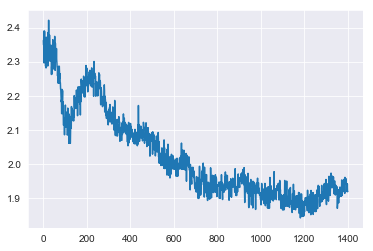

---------------------------- try : 1500th -------------------------


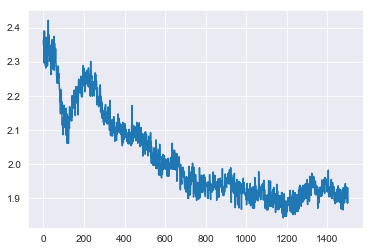

---------------------------- try : 1600th -------------------------


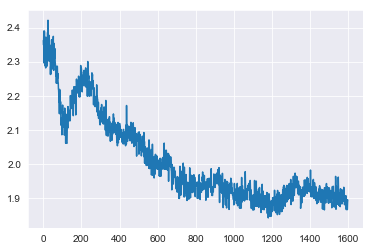

---------------------------- try : 1700th -------------------------


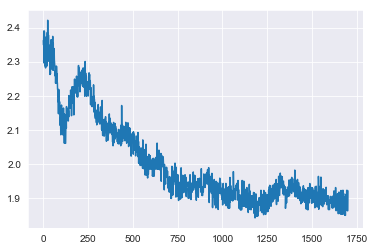

---------------------------- try : 1800th -------------------------


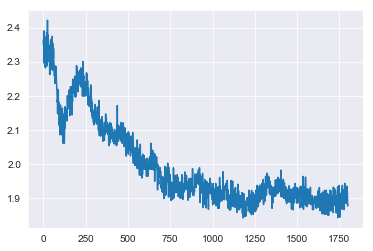

---------------------------- try : 1900th -------------------------


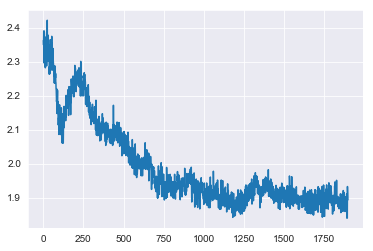

---------------------------- try : 2000th -------------------------


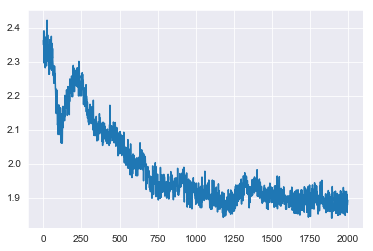

---------------------------- try : 2100th -------------------------


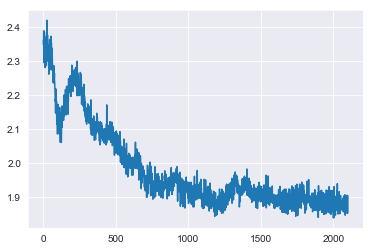

---------------------------- try : 2200th -------------------------


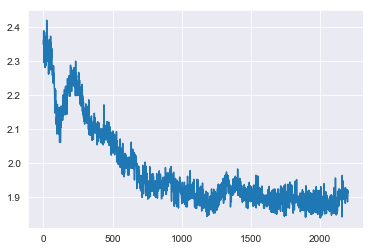

---------------------------- try : 2300th -------------------------


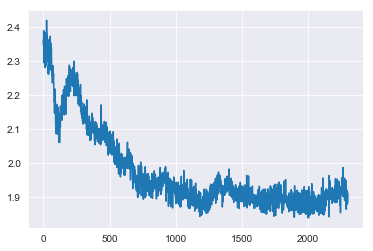

---------------------------- try : 2400th -------------------------


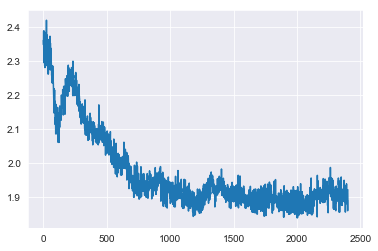

---------------------------- try : 2500th -------------------------


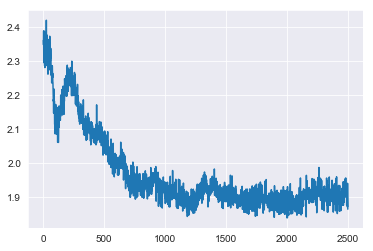

KeyboardInterrupt: 

In [302]:
weights = [1/6]*6
indexes = [1, 2, 13, 14, 15, 16]
n_try=2000
lr = 0.005
result_list = []
weight_list = []

for i in range(n_try):
    train_v1 = train.copy()
    train_v1.loc[:4319, 'Y18'] =0
    
    for j in range(len(indexes)):
        idx = str(indexes[j])
        if len(idx) ==1:
            idx = '0' + idx
        col = 'Y' + idx
        train_v1.loc[:4319, 'Y18'] += weights[j] * train_v1.loc[:4319, col]
        
    train_X = train_v1[[col for col in train.columns if col.startswith('X')]]
    train_y = train_v1['Y18']

    # EN training
    lgb_model = lgb.LGBMRegressor( n_estimators=128, 
                               num_leaves=16, 
                               bagging_fraction = 0.9,
                               feature_fraction = 0.7, 
                               feature_fraction_seed=9, 
                               bagging_seed=9,
                               learning_rate=0.05,
                               bagging_freq = 20,
                               max_bin = 32, 
                               min_data_in_leaf = 2, 
                               min_child_samples=20,
                               min_sum_hessian_in_leaf = 1, 
                               n_jobs = -1,
                               random_state=5) 
    grid_param={}
    new_result = best_param(lgb_model, grid_param, 4, train_X, train_y)[0][0][0]
    
    if not result_list or new_result == result_list[-1]:
        a, b = np.random.choice(6,2)
        weights[a] += lr
        weights[b] -= lr
    elif new_result < result_list[-1]:
        weights[a] += lr
        weights[b] -= lr
    elif new_result > result_list[-1]:
        weights[a] -= lr
        weights[b] += lr
        a, b = np.random.choice(6,2)
        weights[a] += lr
        weights[b] -= lr
    result_list.append(new_result)
    weight_list.append(weights)
    
    if i%100 == 0:
        print('---------------------------- try : {}th -------------------------'.format(i))
        plt.plot(result_list)
        plt.show()

[0.18666666666666665, 0.2766666666666667, 0.08666666666666659, -0.08333333333333343, 0.22666666666666668, 0.30666666666666675]


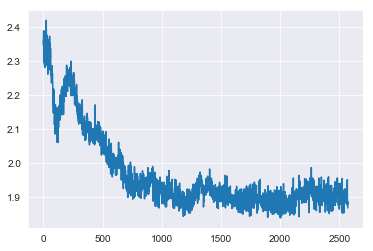

In [303]:
print(weight_list[np.where(result_list == min(result_list))[0][0]])
plt.plot(result_list)
plt.show()